Based on https://github.com/Savvysherpa/slda .  
Modified to the prediction of multivariate normal (diagonal covariance) responses.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
V = 25   # number of vocabulary
K = 10   # number of topics
N = 100  # number of words in each document
D = 1000 # total number of documents

## Generate topics

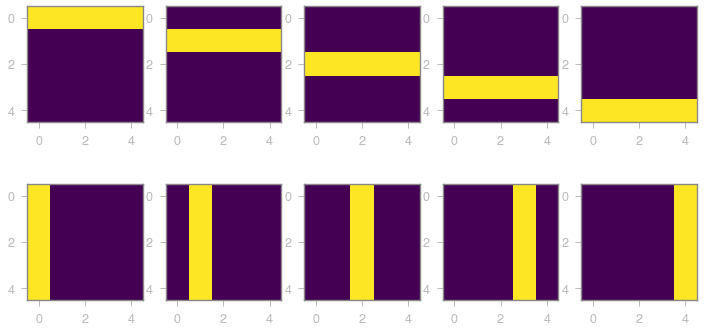

In [3]:
topics = []
topic_base = np.concatenate((np.ones((1, 5)) * 0.2, np.zeros((4, 5))), axis=0).ravel()
for i in range(5):
    topics.append(np.roll(topic_base, i * 5))
topic_base = np.concatenate((np.ones((5, 1)) * 0.2, np.zeros((5, 4))), axis=1).ravel()
for i in range(5):
    topics.append(np.roll(topic_base, i))
topics = np.array(topics)

fig, axes = plt.subplots(figsize=(12,6), nrows=2, ncols=5)
for k in range(K):
    row_ind = int(k / 5)
    col_ind = k % 5
    axes[row_ind, col_ind].imshow(topics[k, :].reshape((5, 5)))
plt.show()

## Generate documents from topics

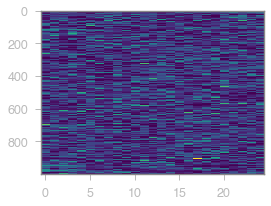

In [4]:
alpha = np.ones(K)
thetas = np.random.dirichlet(alpha, size=D)
topic_assignments = np.array([np.random.choice(range(K), size=N, p=theta)
                              for theta in thetas])
word_assignments = np.array([[np.random.choice(range(V), size=1, p=topics[topic_assignments[d, n]])[0]
                              for n in range(N)] for d in range(D)])
doc_term_matrix = np.array([np.histogram(word_assignments[d], bins=V, range=(0, V - 1))[0] for d in range(D)])

fig, ax = plt.subplots(figsize=(4,3))
ax.imshow(doc_term_matrix, aspect='auto')
plt.show()

## Generate responses

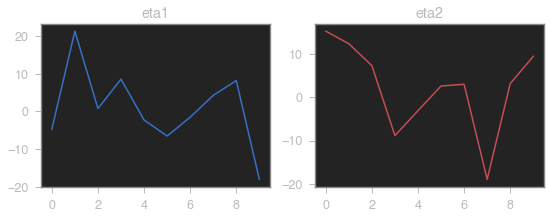

In [5]:
nu2 = 10
sigma2 = 1

eta1 = np.random.normal(scale=nu2, size=K)
eta2 = np.random.normal(scale=nu2, size=K)
fig, axes = plt.subplots(figsize=(9,3), ncols=2)
axes[0].plot(range(K), eta1, color='b')
axes[1].plot(range(K), eta2, color='r')
axes[0].set_title('eta1'); axes[1].set_title('eta2')
plt.show()

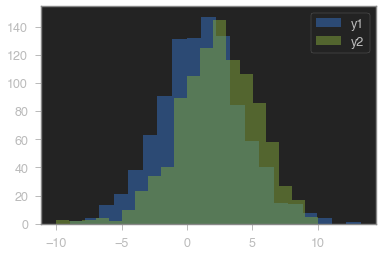

In [6]:
y1 = [np.dot(eta1, thetas[i]) for i in range(D)] + np.random.normal(scale=sigma2, size=D)
y2 = [np.dot(eta2, thetas[i]) for i in range(D)] + np.random.normal(scale=sigma2, size=D)
y = np.hstack((y1[:, np.newaxis], y2[:, np.newaxis]))

fig, ax = plt.subplots()
ax.hist(y[:, 0], bins=20, alpha=.5, label='y1')
ax.hist(y[:, 1], bins=20, alpha=.5, label='y2')
ax.legend()
plt.show()

In [7]:
np.savetxt('y.txt', y)

In [8]:
with open('train.dat', 'w') as ofp:
    for i in range(D):
        ofp.write(' '.join([str(ID)+':'+str(Cnt) for ID, Cnt in zip(range(1,V+1), doc_term_matrix[i,:])])+'\n')

## Estimate parameters

In [9]:
!../src/mvslda -I 300 -K 10 -Y 2 ./train.dat ./y.txt ./model

Number of documents          = 1000
Number of unique words       = 25
Number of latent classes     = 10
Number of responses          = 2
Number of iteration          = 300
iteration  1/300..
	likelihood ... -563187.61638514
	alpha = 
	0.23470258 0.23446854 0.23567106 0.23425488 0.23611445 0.23624292 0.23399243 0.23502773 0.23693227 0.23252581 
	beta ... 0.19
iteration  2/300..
	likelihood ... -544040.95798404
	alpha = 
	0.34841265 0.34990659 0.34877836 0.34853384 0.35485317 0.35298835 0.35041844 0.35127580 0.35281494 0.34081417 
	beta ... 0.29
iteration  3/300..
	likelihood ... -526351.73554376
	alpha = 
	0.43029149 0.42673435 0.42568159 0.42626259 0.43179413 0.43150267 0.43485317 0.42746134 0.42649315 0.41186494 
	beta ... 0.38
iteration  4/300..
	likelihood ... -510551.14996076
	alpha = 
	0.47468593 0.46989135 0.46846668 0.46692993 0.46779500 0.47918974 0.47922356 0.47281503 0.46932145 0.43663381 
	beta ... 0.46
iteration  5/300..
	likelihood ... -500643.48854163
	alpha = 
	0.4912854

	likelihood ... -419794.16763496
	alpha = 
	0.44695200 0.48127101 0.50611765 0.27061839 0.53667193 0.44520808 0.49569140 0.36971427 0.53232403 0.45130673 
	beta ... 0.42
iteration 45/300..
	likelihood ... -420219.62171853
	alpha = 
	0.45535880 0.49478566 0.51485077 0.28148989 0.53768213 0.44252657 0.50221958 0.37715445 0.54706827 0.45397906 
	beta ... 0.42
iteration 46/300..
	likelihood ... -418896.34310839
	alpha = 
	0.46238503 0.50992189 0.52943978 0.27961557 0.54168600 0.43893736 0.49880694 0.37962981 0.56816886 0.46815558 
	beta ... 0.42
iteration 47/300..
	likelihood ... -418752.88299951
	alpha = 
	0.47028302 0.52335735 0.54183122 0.28130166 0.55272410 0.44090650 0.50285016 0.38504359 0.57425947 0.47801396 
	beta ... 0.41
iteration 48/300..
	likelihood ... -418449.03557987
	alpha = 
	0.47152501 0.53310982 0.55127409 0.28561157 0.56328238 0.45079625 0.50661981 0.38720808 0.57984574 0.48591341 
	beta ... 0.41
iteration 49/300..
	likelihood ... -417722.55569697
	alpha = 
	0.47977454 

	likelihood ... -405343.14628062
	alpha = 
	0.70873773 0.66197709 0.67720052 0.31588183 0.74453966 0.53532328 0.68058096 0.54508636 0.67670788 0.64772979 
	beta ... 0.25
iteration 89/300..
	likelihood ... -405989.38378104
	alpha = 
	0.72283534 0.65376185 0.67983179 0.33074694 0.75523778 0.53446653 0.68587109 0.55114717 0.67217460 0.64861182 
	beta ... 0.26
iteration 90/300..
	likelihood ... -405262.10806246
	alpha = 
	0.72991955 0.64387244 0.68314954 0.33246660 0.75686627 0.53398664 0.68690137 0.55663281 0.66235944 0.64656420 
	beta ... 0.26
iteration 91/300..
	likelihood ... -403982.74617134
	alpha = 
	0.73838730 0.64784715 0.68327111 0.32794475 0.75911141 0.52936520 0.69527532 0.56234451 0.65382682 0.64384331 
	beta ... 0.25
iteration 92/300..
	likelihood ... -403983.05528198
	alpha = 
	0.74875802 0.65292104 0.68552926 0.32670401 0.76196133 0.52591659 0.69541709 0.57004046 0.65489916 0.64802140 
	beta ... 0.25
iteration 93/300..
	likelihood ... -404122.94364374
	alpha = 
	0.75353668 

	likelihood ... -393760.61644708
	alpha = 
	0.88309470 0.71382000 0.85226992 0.64890130 0.88654328 0.64559250 0.76773589 0.68135980 0.73101481 0.82161329 
	beta ... 0.16
iteration 133/300..
	likelihood ... -393439.14578881
	alpha = 
	0.88917421 0.71731300 0.85688694 0.64812992 0.88557153 0.64651490 0.76794926 0.67871076 0.73256498 0.81326378 
	beta ... 0.16
iteration 134/300..
	likelihood ... -392695.30382019
	alpha = 
	0.90200327 0.71673045 0.86766398 0.65417305 0.88540755 0.65328520 0.76444582 0.67459886 0.72964959 0.80996601 
	beta ... 0.16
iteration 135/300..
	likelihood ... -392364.33825712
	alpha = 
	0.90957615 0.71280447 0.87868546 0.66264241 0.87610851 0.66653861 0.76015446 0.67062012 0.72172957 0.81081673 
	beta ... 0.16
iteration 136/300..
	likelihood ... -392603.79830829
	alpha = 
	0.91359646 0.71214573 0.88389004 0.67599128 0.87069088 0.66624961 0.75616979 0.67269805 0.71586448 0.79969302 
	beta ... 0.16
iteration 137/300..
	likelihood ... -392022.16192982
	alpha = 
	0.9045

	likelihood ... -387507.75675733
	alpha = 
	0.90535143 0.84269647 0.92531174 0.83252506 0.91420972 0.76963185 0.82347500 0.78022033 0.84622575 0.89892429 
	beta ... 0.15
iteration 178/300..
	likelihood ... -387082.31365735
	alpha = 
	0.90259133 0.83554376 0.92391980 0.82865649 0.91076281 0.77006766 0.82398083 0.77383881 0.84658309 0.89624610 
	beta ... 0.15
iteration 179/300..
	likelihood ... -387221.61564074
	alpha = 
	0.91058608 0.83305587 0.91805919 0.83098803 0.91815686 0.76291101 0.82769973 0.76973626 0.85002148 0.89754515 
	beta ... 0.14
iteration 180/300..
	likelihood ... -387735.82345675
	alpha = 
	0.90389637 0.83635216 0.91767408 0.82526069 0.92830351 0.75482977 0.83778984 0.77044162 0.86088186 0.89937333 
	beta ... 0.14
iteration 181/300..
	likelihood ... -386848.65364797
	alpha = 
	0.90529968 0.82203035 0.91668208 0.82937972 0.91877130 0.75838102 0.83906367 0.77441432 0.86536726 0.89029720 
	beta ... 0.14
iteration 182/300..
	likelihood ... -386775.35648986
	alpha = 
	0.9109

	likelihood ... -382251.40664409
	alpha = 
	1.00549396 0.89403116 1.00298196 0.85327901 1.02157451 0.79481312 0.86695194 0.78471396 0.83423850 0.94211572 
	beta ... 0.10
iteration 222/300..
	likelihood ... -382256.85083457
	alpha = 
	0.99912540 0.89487000 0.99339099 0.85596595 1.02049423 0.78889516 0.87071018 0.79013410 0.84479201 0.93598451 
	beta ... 0.11
iteration 223/300..
	likelihood ... -382277.94090220
	alpha = 
	0.98826666 0.89543099 1.00371817 0.86547713 1.02401434 0.78234545 0.86674537 0.79468043 0.85355575 0.93576005 
	beta ... 0.10
iteration 224/300..
	likelihood ... -382048.72136396
	alpha = 
	0.99116618 0.90191686 1.01107078 0.86376697 1.02254198 0.78382568 0.85735029 0.79245484 0.85345955 0.93604881 
	beta ... 0.10
iteration 225/300..
	likelihood ... -381854.44664492
	alpha = 
	0.98294631 0.89141155 1.01241415 0.85421750 1.02216882 0.78802509 0.85300978 0.79522162 0.84500435 0.93979057 
	beta ... 0.10
iteration 226/300..
	likelihood ... -382221.16872539
	alpha = 
	0.9794

	likelihood ... -379359.43821877
	alpha = 
	1.00529105 0.92219296 1.05985623 0.92322348 1.01166163 0.85434708 0.90542681 0.81675572 0.84805402 0.90433023 
	beta ... 0.10
iteration 266/300..
	likelihood ... -379223.95969625
	alpha = 
	1.00513694 0.91809000 1.06193088 0.91482313 1.00594668 0.86703153 0.89821585 0.81576027 0.85099928 0.91684560 
	beta ... 0.10
iteration 267/300..
	likelihood ... -378433.01302990
	alpha = 
	1.00399040 0.91589800 1.06037466 0.90280148 1.00996556 0.85507365 0.89384063 0.81234367 0.84406395 0.92477369 
	beta ... 0.10
iteration 268/300..
	likelihood ... -379056.60968865
	alpha = 
	1.00946839 0.92345667 1.06274783 0.90272382 1.02087647 0.84292352 0.89155786 0.81434459 0.84224549 0.92463457 
	beta ... 0.09
iteration 269/300..
	likelihood ... -379090.12841588
	alpha = 
	1.01957270 0.92132025 1.06132369 0.90555171 1.02116921 0.83263721 0.89260003 0.81808217 0.85014214 0.92691911 
	beta ... 0.09
iteration 270/300..
	likelihood ... -378428.60241983
	alpha = 
	1.0142

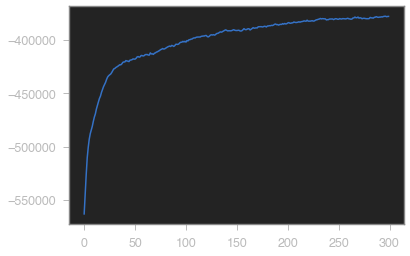

In [10]:
# likelihood
lik = np.loadtxt('./model.lik')
fig, ax = plt.subplots()
ax.plot(range(len(lik)), lik)
plt.show()

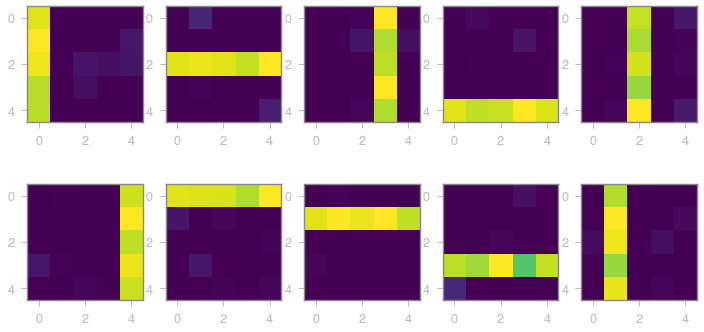

In [11]:
# phi
phi = np.loadtxt('./model.phi')
fig, axes = plt.subplots(figsize=(12,6), nrows=2, ncols=5)
for k in range(K):
    row_ind = int(k / 5)
    col_ind = k % 5
    axes[row_ind, col_ind].imshow(phi[:, k].reshape((5, 5)))
plt.show()

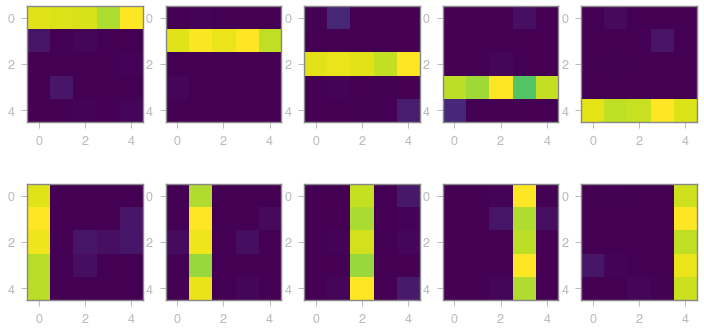

In [12]:
# topic reordering
from scipy.spatial.distance import cdist
topic_reorder = np.argsort([np.argmin(cdist([phi[:, k]], topics)[0]) for k in range(K)])

phi = phi[:, topic_reorder]
fig, axes = plt.subplots(figsize=(12,6), nrows=2, ncols=5)
for k in range(K):
    row_ind = int(k / 5)
    col_ind = k % 5
    axes[row_ind, col_ind].imshow(phi[:, k].reshape((5, 5)))
plt.show()

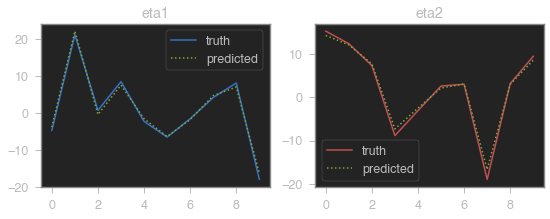

In [13]:
# eta
eta = np.loadtxt('./model.eta')
eta = eta[topic_reorder, :]

fig, axes = plt.subplots(figsize=(9,3), ncols=2)
axes[0].plot(range(K), eta1, color='b', label='truth')
axes[0].plot(range(K), eta[:, 0], color='g', linestyle=':', label='predicted')
axes[1].plot(range(K), eta2, color='r', label='truth')
axes[1].plot(range(K), eta[:, 1], color='g', linestyle=':', label='predicted')
axes[0].set_title('eta1'); axes[1].set_title('eta2')
axes[0].legend(); axes[1].legend()
plt.show()